In [21]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import gzip
from matplotlib import rc
import warnings

plt.style.use('seaborn-v0_8-white')
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
warnings.filterwarnings("ignore")

In [22]:
def load_data(filename):
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Example usage
loaded_data = load_data('arnold_sims/arnold_tongue_dict_latest.pkl.gz')

In [23]:
Omegas_tested = loaded_data["Omega"]
Coupling_strengths_tested = loaded_data["coupling_strength"]
A_ext_tested = loaded_data["A_ext"]
Entrainments = loaded_data["entrainment_value"]
Exceptions = loaded_data["exception"]

color_map = [
    'C0' if entrainment == 0.5 else
    'C1' if entrainment == 1 else
    'C2' if entrainment == 1.5 else
    'C6' if entrainment == 2 else
    'red' if Exceptions[i] == True else
    'gray'
    for i, entrainment in enumerate(Entrainments)
]

Text(0.5, 0, 'External / Internal Period')

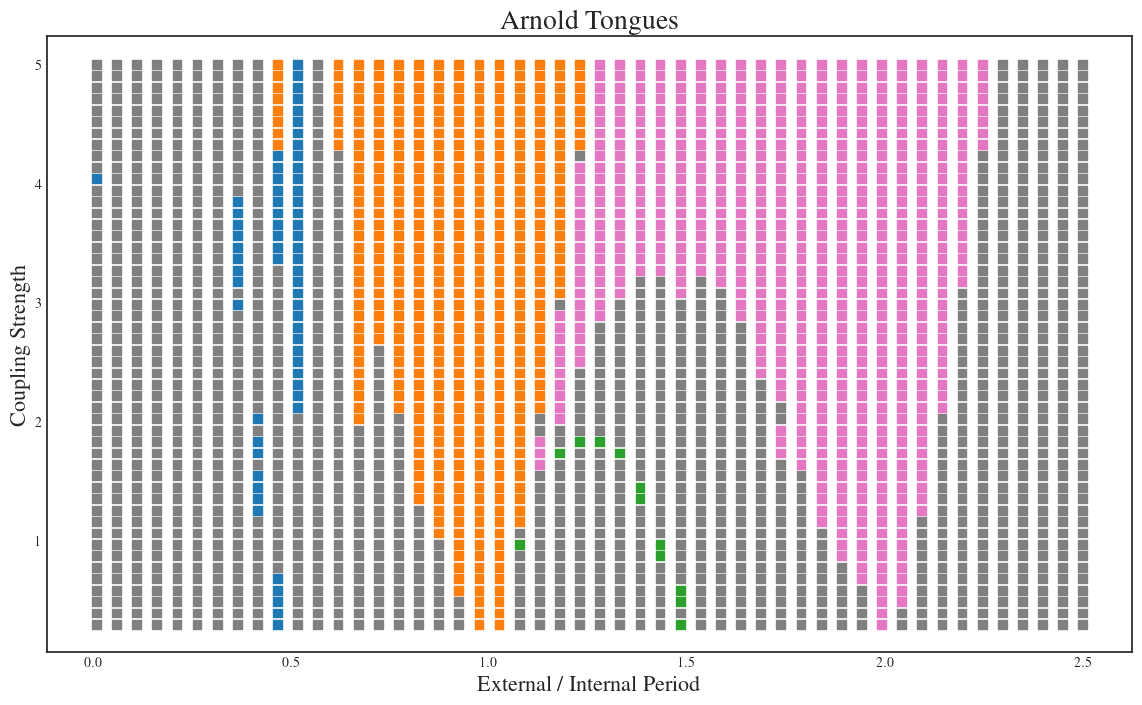

In [24]:
plt.figure(figsize=(14,8))

plt.scatter(Omegas_tested, Coupling_strengths_tested, c=color_map, s=40, marker="s")

plt.title("Arnold Tongues", fontsize=20)
plt.ylabel("Coupling Strength", fontsize=16)
plt.xlabel("External / Internal Period", fontsize=16)